In [1]:
from basicpy import BaSiC
import numpy as np

import zarr
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# path = '/u/home/f/f7xiesnm/project-zipursky/data/hold/lt172/r1_export.n5'
path = "/u/scratch/f/f7xiesnm/lt172_gene_r1/dataset.n5"

zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
images = zarr_data[f'setup0/timepoint0/s3'][...]
images2 = zarr_data[f'setup4/timepoint0/s3'][...]

images.shape, images2.shape

((371, 240, 240), (371, 240, 240))

In [3]:
# images    = images.astype(np.float16) # then save back as uint16
# images_s3 = images_s3.astype(np.float16)

# images    = np.clip(images   -90, 0, None)
# images_s3 = np.clip(images_s3-90, 0, None)

<Axes: ylabel='Count'>

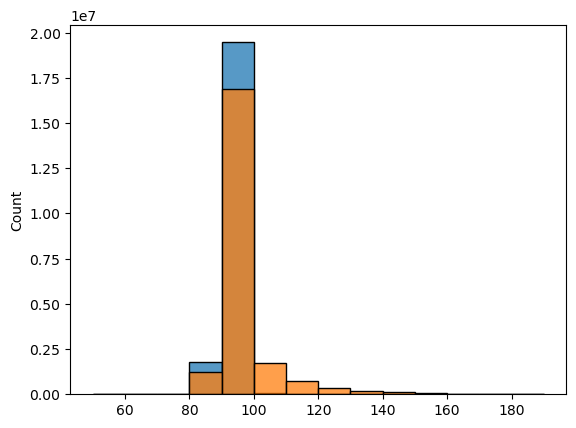

In [4]:
sns.histplot(np.ravel(images), bins=np.arange(50, 200, 10))
sns.histplot(np.ravel(images2), bins=np.arange(50, 200, 10))

In [5]:
images_both = np.vstack([images, images2])
images_both.shape

(742, 240, 240)

In [6]:
%%time
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images_both)

CPU times: user 2min 20s, sys: 54.4 s, total: 3min 15s
Wall time: 43.6 s


In [7]:
%%time
images_transformed = (images_both - basic.darkfield[np.newaxis])/ basic.flatfield[np.newaxis]

CPU times: user 83.8 ms, sys: 219 ms, total: 302 ms
Wall time: 300 ms


In [8]:
# from scipy.ndimage import zoom

# df_s3 = zoom(basic.darkfield, 2)
# ff_s3 = zoom(basic.flatfield, 2)
# df_s3 = np.pad(df_s3, ((0,1), (0,0)), constant_values=0)
# ff_s3 = np.pad(ff_s3, ((0,1), (0,0)), constant_values=1)
# df_s3.shape, ff_s3.shape

In [9]:
# images_trans_s3 = (images_s3 - df_s3[np.newaxis])/ ff_s3[np.newaxis]

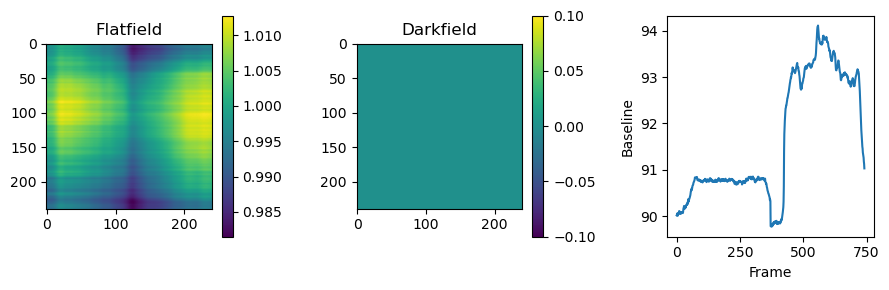

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

In [11]:
# fig, axes = plt.subplots(1, 3, figsize=(9, 3))
# im = axes[0].imshow(ff_s3)
# fig.colorbar(im, ax=axes[0])
# axes[0].set_title("Flatfield")
# im = axes[1].imshow(df_s3)
# fig.colorbar(im, ax=axes[1])
# axes[1].set_title("Darkfield")
# axes[2].plot(basic.baseline)
# axes[2].set_xlabel("Frame")
# axes[2].set_ylabel("Baseline")
# fig.tight_layout()

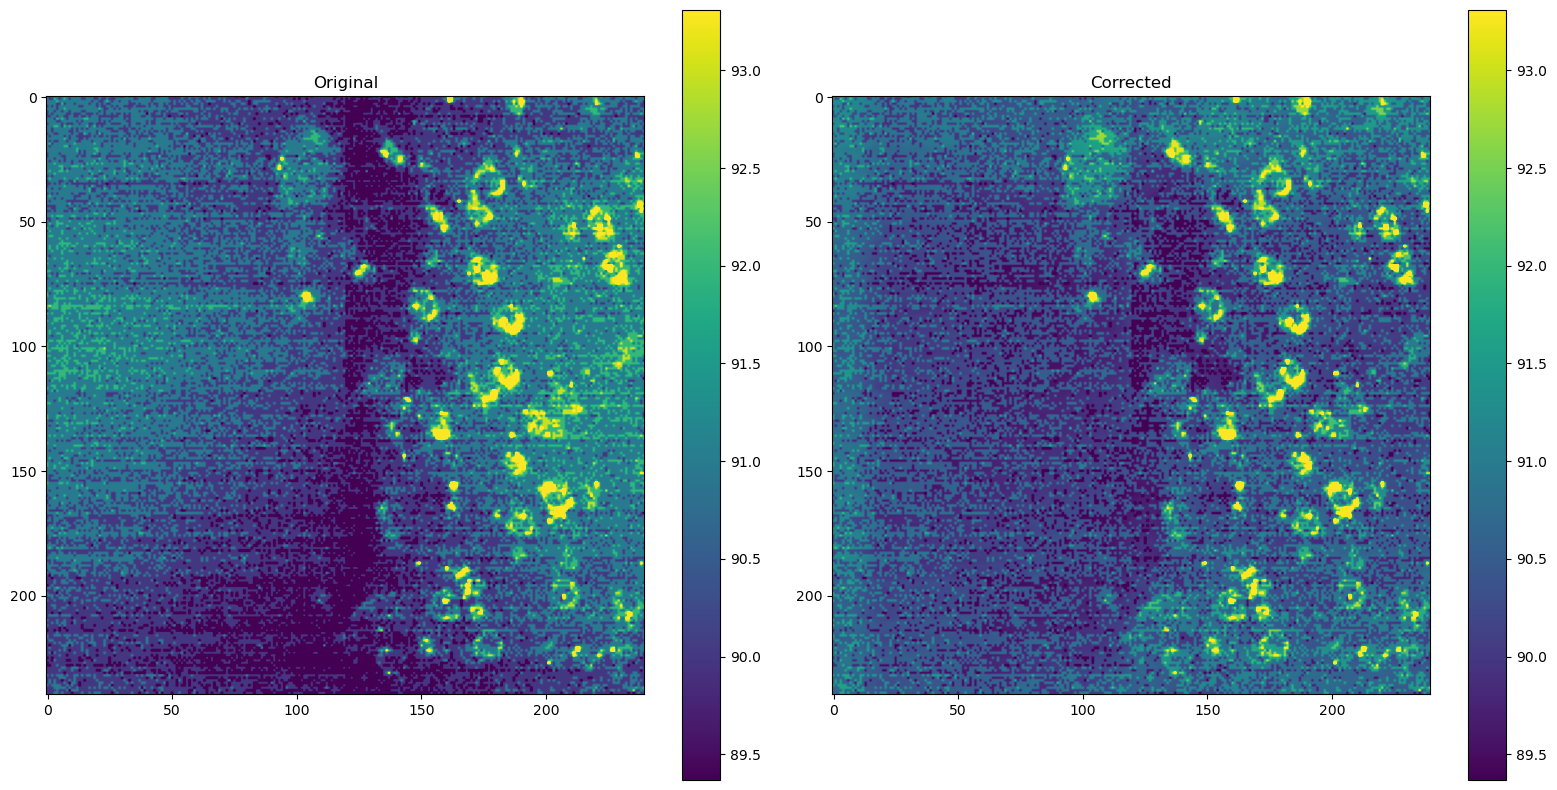

In [12]:
i = 50
vmin = np.percentile(images_transformed[i], 5)
vmax = np.percentile(images_transformed[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images_both[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()

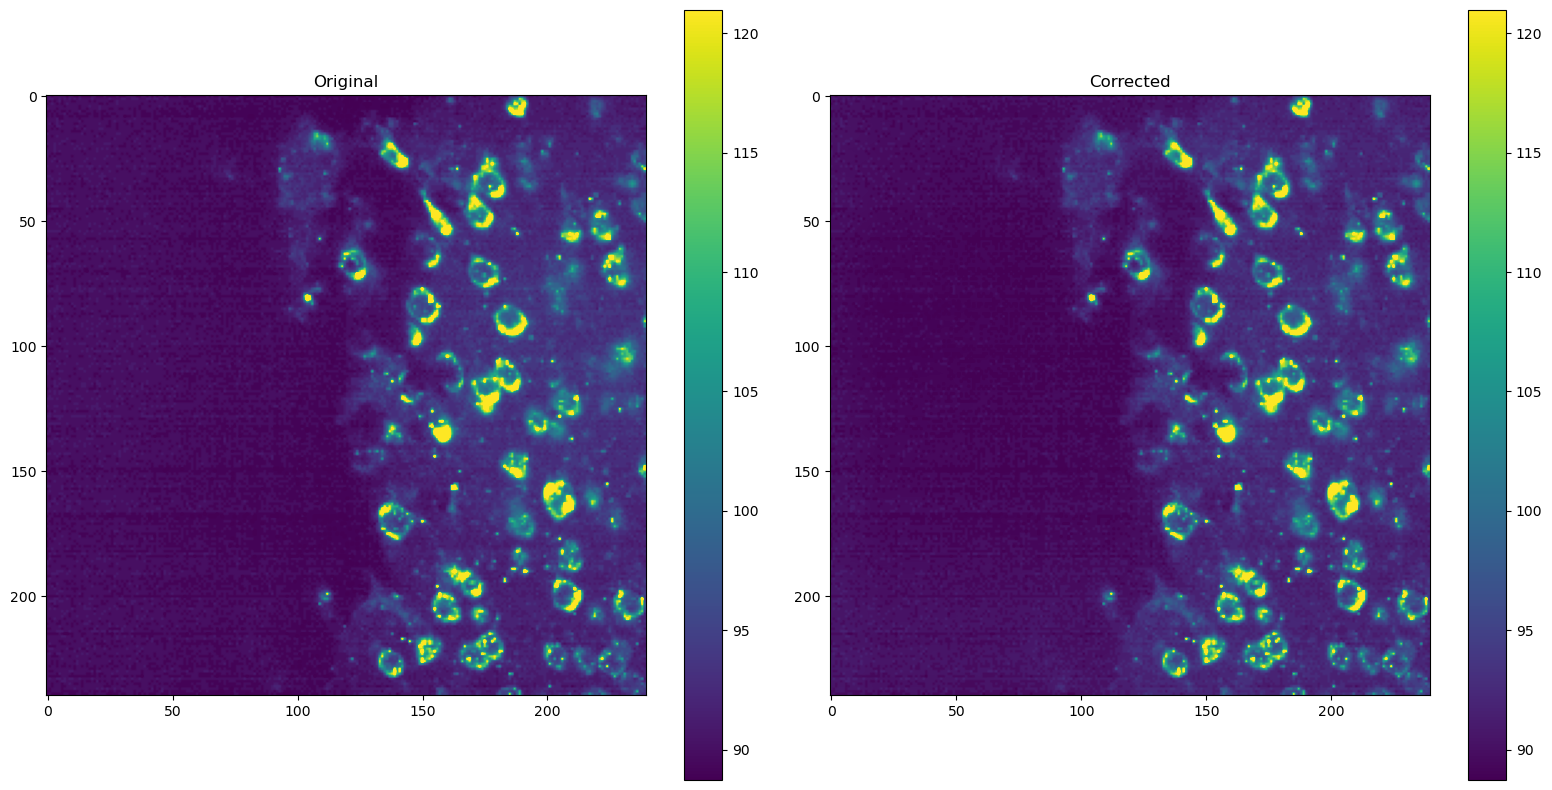

In [13]:
i = 372+50
vmin = np.percentile(images_transformed[i], 5)
vmax = np.percentile(images_transformed[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images_both[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()

In [14]:
# i = 0 
# vmin = np.percentile(images_trans_s3[i], 5)
# vmax = np.percentile(images_trans_s3[i], 99)

# fig, axes = plt.subplots(1, 2, figsize=(16,8))
# im = axes[0].imshow(images_s3[i], vmin=vmin, vmax=vmax)
# fig.colorbar(im, ax=axes[0])
# axes[0].set_title("Original")
# im = axes[1].imshow(images_trans_s3[i], vmin=vmin, vmax=vmax)
# fig.colorbar(im, ax=axes[1])
# axes[1].set_title("Corrected")
# fig.tight_layout()